In [1]:
def softmax(z):
    """
    Compute the softmax of a 2D numpy array along axis=1.
    """
    # Normalize to prevent numerical instability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [2]:
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.
    """
    # Add epsilon to prevent log(0)
    return -np.sum(y_true * np.log(y_pred + 1e-10))

In [13]:
def cost_softmax(X, y, W, b):
    # Compute z = XW + b
    z = np.dot(X, W) + b

    # Get predicted probabilities
    y_pred = softmax(z)

    # Compute average cross-entropy loss
    cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]

    return cost


In [12]:
def compute_gradient_softmax(X, y, W, b):
    # Get number of samples and features
    n, d = X.shape

    # Compute z = XW + b
    z = np.dot(X, W) + b

    # Apply softmax to get predicted probabilities
    y_pred = softmax(z)

    # Error = prediction - actual
    error = y_pred - y

    # Gradient for weights
    grad_W = np.dot(X.T, error) / n

    # Gradient for bias
    grad_b = np.sum(error, axis=0) / n

    return grad_W, grad_b


In [11]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize weights and biases for softmax regression.
    """
    cost_history = []

    for i in range(n_iter):
        # Get gradients of loss w.r.t W and b
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update weights and bias using gradient descent
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Calculate current cost and store it
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Print cost after every 100 iterations (optional)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


In [10]:
def predict_softmax(X, W, b):
    # Calculate z = XW + b
    z = np.dot(X, W) + b

    # Convert scores to probabilities using softmax
    y_pred_probs = softmax(z)

    # Pick the class with highest probability
    return np.argmax(y_pred_probs, axis=1)


Training Softmax Regression Model...
Iteration 0: Cost = 1.007146
Iteration 100: Cost = 0.320108
Iteration 200: Cost = 0.251776
Iteration 300: Cost = 0.211968
Iteration 400: Cost = 0.185130
Iteration 500: Cost = 0.165809
Iteration 600: Cost = 0.151254
Iteration 700: Cost = 0.139902
Iteration 800: Cost = 0.130800
Iteration 900: Cost = 0.123337
Iteration 999: Cost = 0.117161

Train Accuracy: 96.67%
Test Accuracy: 93.33%


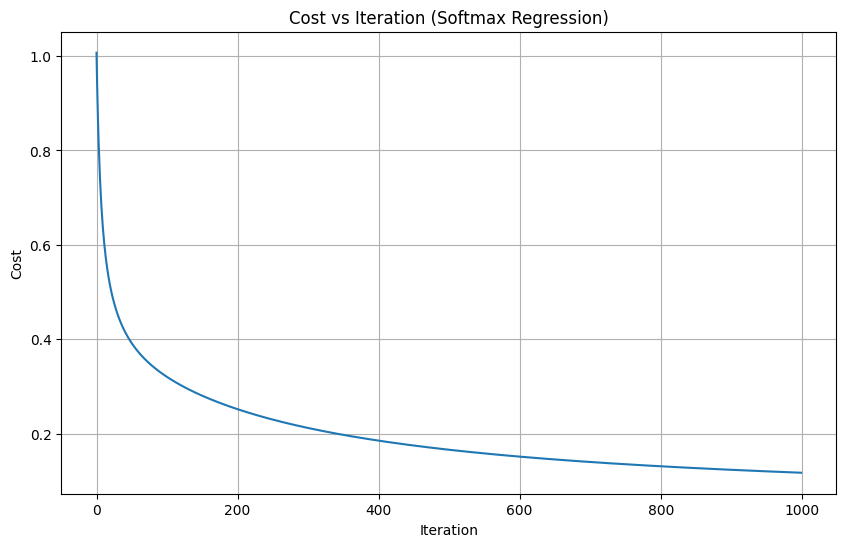

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# -----------------------------
# Load and Prepare Dataset
# -----------------------------

# Read the Iris dataset
df = pd.read_csv('Iris.csv')

# Extract feature matrix (X) and target variable (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

# Map class names to numerical labels
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_numeric = np.array([species_mapping[label] for label in y])

# One-hot encode the target labels for softmax regression
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y_numeric.reshape(-1, 1))

# -----------------------------
# Split and Scale Dataset
# -----------------------------

# Split into training/testing sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y_numeric
)

# Standardize features (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Initialize Model Parameters
# -----------------------------

num_features = X_train_scaled.shape[1]   # Number of input features (4)
num_classes = y_train.shape[1]           # Number of classes (3)

W = np.zeros((num_features, num_classes))  # Weight matrix
b = np.zeros(num_classes)                  # Bias vector

# -----------------------------
# Train Softmax Regression
# -----------------------------

alpha = 0.1   # Learning rate
n_iter = 1000 # Number of gradient descent iterations

print("Training Softmax Regression Model...")

# Call gradient descent training function (user-defined)
W_opt, b_opt, cost_history = gradient_descent_softmax(
    X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True
)

# -----------------------------
# Make Predictions
# -----------------------------

# Predict class labels using trained model
y_train_pred = predict_softmax(X_train_scaled, W_opt, b_opt)
y_test_pred = predict_softmax(X_test_scaled, W_opt, b_opt)

# Convert one-hot encoded labels back to class indices
y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# -----------------------------
# Model Evaluation
# -----------------------------

# Calculate accuracy
train_accuracy = np.mean(y_train_pred == y_train_true) * 100
test_accuracy = np.mean(y_test_pred == y_test_true) * 100

print(f"\nTrain Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# -----------------------------
# Plot Training Cost
# -----------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Softmax Regression)')
plt.grid(True)
plt.show()
